# Notes
### 1. variable: eta_t
    default fill value: -32,768
#### (a) time_ytocean_arr\[0] contains missing values <br>
![time_ytocean_arr](images/time_ytocean_arr.png)
#### (b) time_ytocean_arr.data\[0] fills the missing values with default '_FillValue: -32768' <br>
![time_ytocean_arr_data](images/time_ytocean_arr_data.png) <br>
Q: -32768 is too large compare with other values (range between -2 to 0), so what is the resonable value to fill the missing value? mean? median?

In [1]:
import netCDF4 as nc4
import keras
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils


In [2]:
file_path =['C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_01.nc']
file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_02.nc')
file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_03.nc')
file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_04.nc')
# file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_05.nc')
# file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_06.nc')

In [4]:
file_path

['C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_01.nc',
 'C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_02.nc',
 'C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_03.nc',
 'C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_04.nc']

In [3]:
ds = nc4.MFDataset(file_path)
eta_t_arr = ds.variables['eta_t'][:]

In [4]:
eta_t_arr.shape

(121, 1500, 3600)

In [5]:
time_ytocean_arr = eta_t_arr[:,:,1]
time_ytocean_arr.shape

(121, 1500)

In [6]:
time_ytocean_arr[1].data

array([-3.2768000e+04, -3.2768000e+04, -3.2768000e+04, ...,
       -7.9348123e-01, -7.9348123e-01, -7.3244423e-01], dtype=float32)

In [70]:
f = open('text.txt', 'w')
for item in time_ytocean_arr:
    f.write(','.join([str(j) for j in item]) + '\n')
    # print(item)

In [8]:
for arr in time_ytocean_arr.data:
    arr[arr == -32768] = 0

In [9]:
# split into train & test
time_ytocean_train, time_ytocean_test = train_test_split(time_ytocean_arr.data, test_size=0.33)
time_ytocean_train.shape

(81, 1500)

In [10]:
time_ytocean_train[0]

array([ 0.        ,  0.        ,  0.        , ..., -0.82399976,
       -0.82399976, -0.76296276], dtype=float32)

In [13]:
input_size = 1500
hidden_size = 1500
output_size = 1500

In [14]:
# fit a single layer autoencoder
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='tanh')(x)
r = Dense(output_size, activation='tanh')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1500)]            0         
_________________________________________________________________
dense (Dense)                (None, 1500)              2251500   
_________________________________________________________________
dense_1 (Dense)              (None, 1500)              2251500   
Total params: 4,503,000
Trainable params: 4,503,000
Non-trainable params: 0
_________________________________________________________________


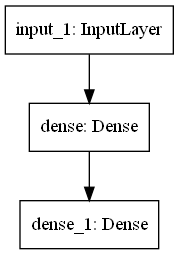

In [12]:
keras.utils.plot_model(autoencoder, "time_ytocean_autoencoder.png")

In [15]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='tanh')(x)
r = Dense(output_size, activation='tanh')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()
epochs = 100
batch_size = 1500

history = autoencoder.fit(time_ytocean_train, time_ytocean_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(time_ytocean_test, time_ytocean_test))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1500)]            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dense_3 (Dense)              (None, 1500)              2251500   
Total params: 4,503,000
Trainable params: 4,503,000
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.7143 - val_loss: 0.3186
Epoch 2/100
1/1 [==============================] - 0s 108ms/step - loss: 0.3198 - val_loss: 0.1934
Epoch 3/100
1/1 [==============================] - 0s 97ms/step - loss: 0.1941 - val_loss: 0.1641
Epoch 4/100
1/1 [==============================] - 0s 97ms/step - loss: 0.1642 - val_l

dict_keys(['loss', 'val_loss'])


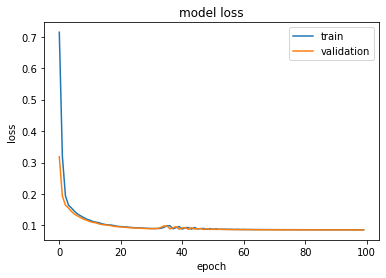

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

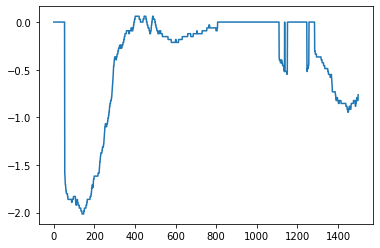

In [18]:
plt.plot(time_ytocean_train[0])
plt.show

# Adding more layers

In [19]:
input_size = 1500
hidden_size = 150
output_size = 1500

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(output_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(output_size, activation='sigmoid')(hidden_2)

autoencoder_m = Model(inputs=x, outputs=r)
autoencoder_m.compile(optimizer='adam', loss='mse')

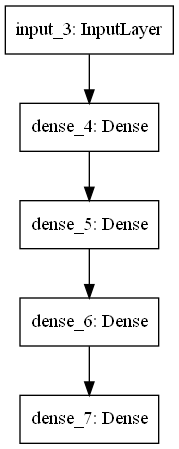

In [30]:
keras.utils.plot_model(autoencoder, "time_ytocean_multilayer_autoencoder.png")

In [20]:
epochs = 100
batch_size = 1500

history_m = autoencoder_m.fit(time_ytocean_train, time_ytocean_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(time_ytocean_test, time_ytocean_test))

Epoch 1/100
1/1 [==============================] - 1s 789ms/step - loss: 1.2040 - val_loss: 1.1783
Epoch 2/100
1/1 [==============================] - 0s 61ms/step - loss: 1.1830 - val_loss: 1.1387
Epoch 3/100
1/1 [==============================] - 0s 60ms/step - loss: 1.1432 - val_loss: 1.0703
Epoch 4/100
1/1 [==============================] - 0s 64ms/step - loss: 1.0745 - val_loss: 0.9768
Epoch 5/100
1/1 [==============================] - 0s 61ms/step - loss: 0.9807 - val_loss: 0.8735
Epoch 6/100
1/1 [==============================] - 0s 60ms/step - loss: 0.8772 - val_loss: 0.7795
Epoch 7/100
1/1 [==============================] - 0s 58ms/step - loss: 0.7830 - val_loss: 0.7058
Epoch 8/100
1/1 [==============================] - 0s 67ms/step - loss: 0.7091 - val_loss: 0.6531
Epoch 9/100
1/1 [==============================] - 0s 64ms/step - loss: 0.6562 - val_loss: 0.6156
Epoch 10/100
1/1 [==============================] - 0s 66ms/step - loss: 0.6185 - val_loss: 0.5880
Epoch 11/100
1/1 [

dict_keys(['loss', 'val_loss'])


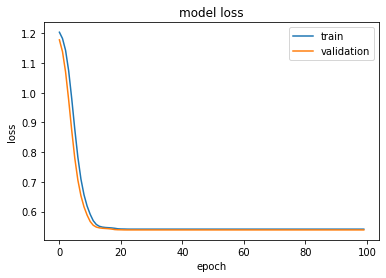

In [21]:
print(history.history.keys())

plt.plot(history_m.history['loss'])
plt.plot(history_m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()